In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet

/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
assign1_data_df = pd.read_csv('assignment_data_train.csv')
print(assign1_data_df.head())

             Timestamp  year  month  day  hour  trips
0  2018-01-01 00:00:00  2018      1    1     0  16714
1  2018-01-01 01:00:00  2018      1    1     1  19041
2  2018-01-01 02:00:00  2018      1    1     2  16590
3  2018-01-01 03:00:00  2018      1    1     3  12626
4  2018-01-01 04:00:00  2018      1    1     4   8739


In [3]:
assign1_data_df_keep = assign1_data_df[['Timestamp', 'trips']]
assign1_data_df_keep.Timestamp = pd.to_datetime(assign1_data_df_keep.Timestamp, infer_datetime_format=True)
assign1_data_df_keep = pd.DataFrame(assign1_data_df_keep.values, columns = ['ds','y'])
print(assign1_data_df_keep.head())

                   ds      y
0 2018-01-01 00:00:00  16714
1 2018-01-01 01:00:00  19041
2 2018-01-01 02:00:00  16590
3 2018-01-01 03:00:00  12626
4 2018-01-01 04:00:00   8739


/var/folders/vy/2bpb02v9637f95q9p3z_nq6w0000gn/T/ipykernel_55212/2443867995.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  assign1_data_df_keep.Timestamp = pd.to_datetime(assign1_data_df_keep.Timestamp, infer_datetime_format=True)
/var/folders/vy/2bpb02v9637f95q9p3z_nq6w0000gn/T/ipykernel_55212/2443867995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assign1_data_df_keep.Timestamp = pd.to_datetime(assign1_data_df_keep.Timestamp, infer_datetime_format=True)


In [4]:
model = Prophet(changepoint_prior_scale=0.5)
model.fit(assign1_data_df_keep)

16:47:24 - cmdstanpy - INFO - Chain [1] start processing
16:47:25 - cmdstanpy - INFO - Chain [1] done processing


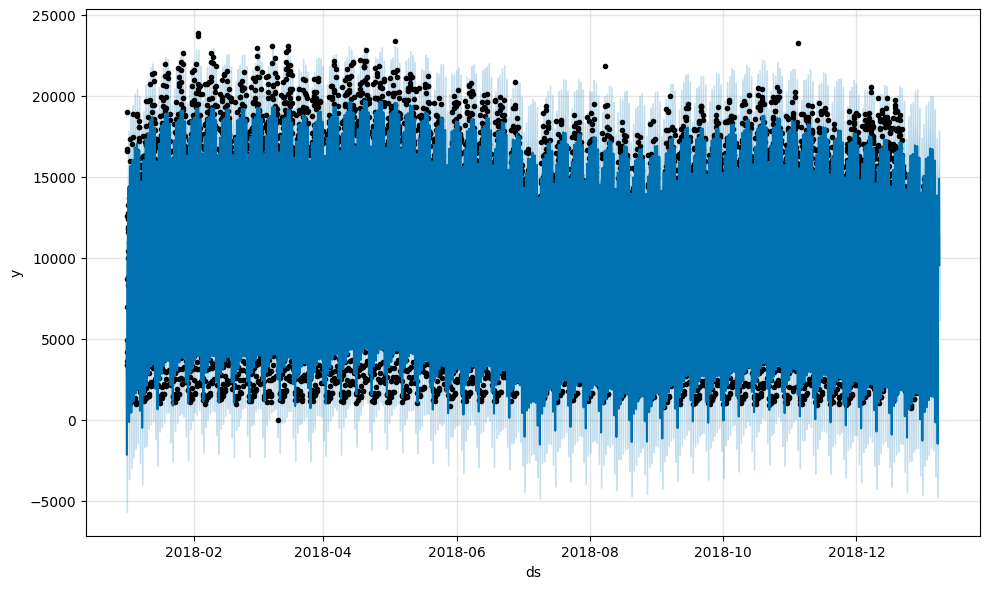

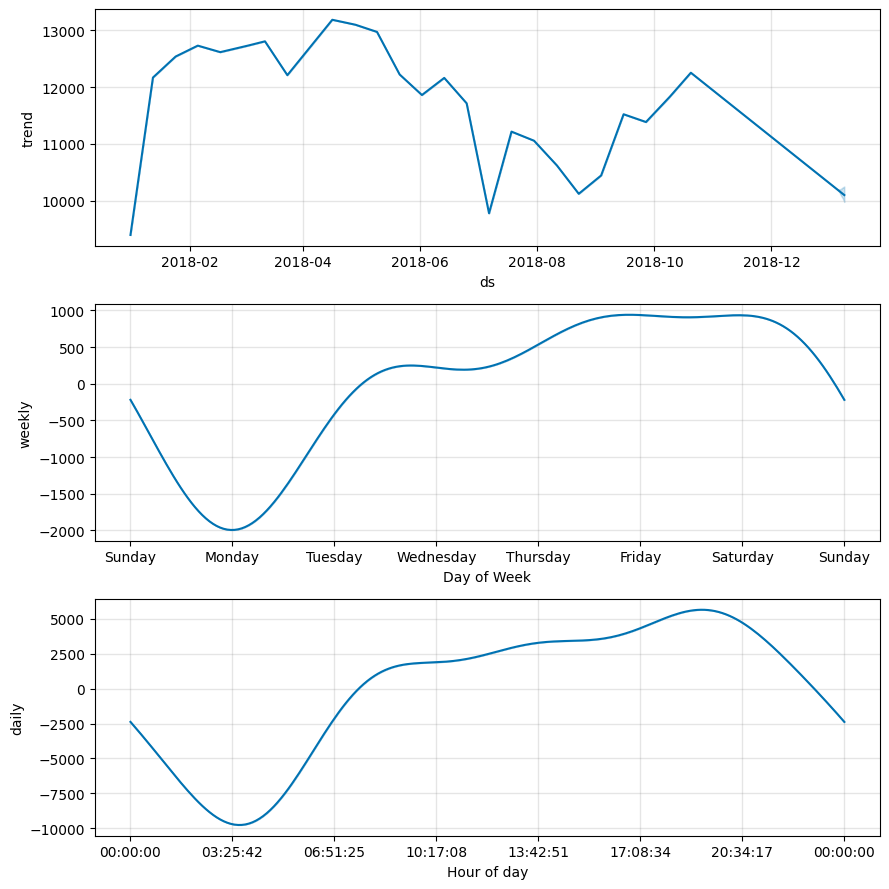

In [5]:
future = model.make_future_dataframe(periods=24*7, freq='h')
forecast = model.predict(future)

plot = model.plot(forecast)
components = model.plot_components(forecast)